In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import glob

os.chdir(r'D:\datos_GPetersii\datos_GPetersii\Fish7\Object\raw\bsoid2\BSOID')
files = glob.glob('*labels*.csv')

In [171]:
for i, file in enumerate(files[13:]) :
    behav = pd.read_csv(file).iloc[:,1].to_numpy()
    if i == 0 :
        behaviors = pd.DataFrame(zip(behav,[i for j in behav])).reset_index()
    else:
        behaviors = pd.concat((behaviors, pd.DataFrame(zip(behav,[i for j in behav])).reset_index()), axis=0)

behaviors.to_csv('behaviorsP7_basal.csv')

In [102]:
behaviors.head()

,index,0,1
0,0,6,0
1,1,6,0
2,2,6,0
3,3,6,0
4,4,6,0


In [66]:
os.chdir(r'D:\datos_GPetersii\datos_GPetersii\behaviors_histogram')
files = sorted(glob.glob('*_*.txt'))
files

['behaviorsP1_basal.txt',
 'behaviorsP1_objeto.txt',
 'behaviorsP2_basal.txt',
 'behaviorsP2_objeto.txt',
 'behaviorsP3_basal.txt',
 'behaviorsP3_objeto.txt',
 'behaviorsP4_basal.txt',
 'behaviorsP4_objeto.txt',
 'behaviorsP5_basal.txt',
 'behaviorsP5_objeto.txt',
 'behaviorsP6_basal.txt',
 'behaviorsP6_objeto.txt',
 'behaviorsP7_basal.txt',
 'behaviorsP7_objeto.txt']

In [67]:
hist_basal = [x for x in files if 'basal' in x]
hist_objeto= [x for x in files if 'objeto' in x]

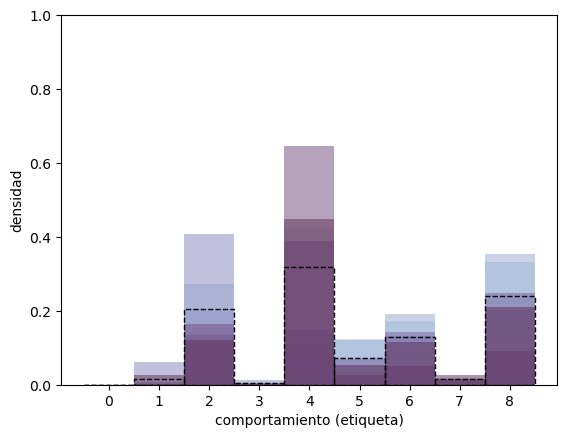

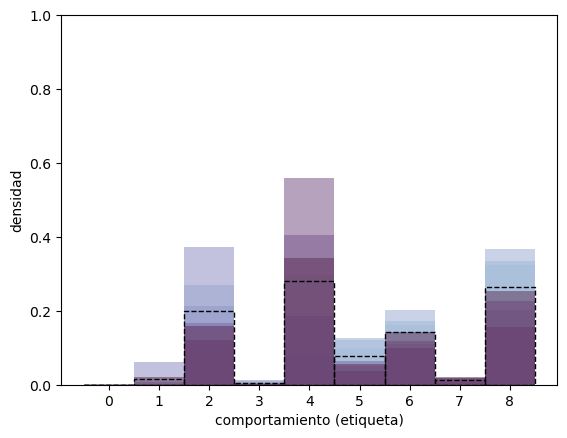

In [75]:
num = 7
cmap = sns.color_palette("ch:s=0.9,r=-0.55", as_cmap=True)
colors = [cmap(i/num) for i in range(num)]
for key in ['basal', 'objeto']:
    hist = hist_basal if key == 'basal' else hist_objeto
    total = []
    fig, ax = plt.subplots()
    for i, file in enumerate(hist):
        behaviors = np.loadtxt(file)
        total += list(behaviors)
        plt.hist(behaviors, density=True, alpha=.5, color=colors[i], bins=np.arange(-.5,9.5, 1))

    plt.hist(total, fill= False, edgecolor='k', bins=np.arange(-.5,9.5, 1), density=True, linestyle='--')
    ax.set(xticks=np.arange(9), xlabel='comportamiento (etiqueta)', ylabel='densidad', ylim=[0,1])
    fig.savefig('histograma_behav_' +key+'.svg', format='svg')

In [87]:
os.chdir(r'D:\datos_GPetersii\datos_GPetersii\behaviors_histogram')
files = sorted(glob.glob('*.txt'))
files = [ x for x in files if '_' not in x]
files

['behaviorsP1.txt',
 'behaviorsP2.txt',
 'behaviorsP3.txt',
 'behaviorsP4.txt',
 'behaviorsP5.txt',
 'behaviorsP6.txt',
 'behaviorsP7.txt']

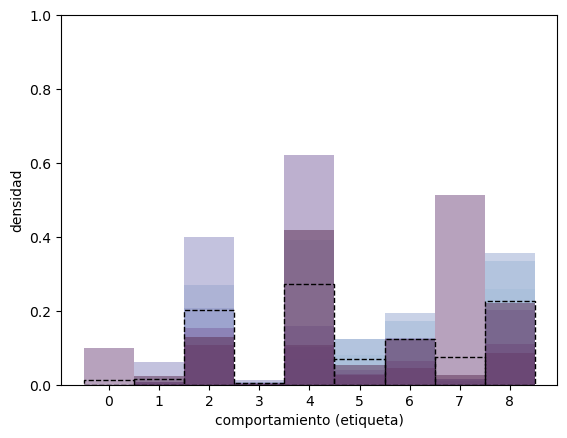

In [88]:
num = 7
cmap = sns.color_palette("ch:s=0.9,r=-0.55", as_cmap=True)
colors = [cmap(i/num) for i in range(num)]

total = []
fig, ax = plt.subplots()
for i, file in enumerate(files):
    behaviors = np.loadtxt(file)
    total += list(behaviors)
    plt.hist(behaviors, density=True, alpha=.5, color=colors[i], bins=np.arange(-.5,9.5, 1))

plt.hist(total, fill= False, edgecolor='k', bins=np.arange(-.5,9.5, 1), density=True, linestyle='--')
ax.set(xticks=np.arange(9), xlabel='comportamiento (etiqueta)', ylabel='densidad', ylim=[0,1])
fig.savefig('histograma_behav.svg', format='svg')

In [172]:
os.chdir(r'D:\datos_GPetersii\datos_GPetersii\behaviors_histogram')
files = sorted(glob.glob('*l.csv'))
files

['behaviorsP1_basal.csv',
 'behaviorsP2_basal.csv',
 'behaviorsP3_basal.csv',
 'behaviorsP4_basal.csv',
 'behaviorsP5_basal.csv',
 'behaviorsP6_basal.csv',
 'behaviorsP7_basal.csv']

In [173]:
for i, file in enumerate(files):
    if i == 0 :
        behaviors = pd.read_csv(file, header=0).iloc[:,1:]
        behaviors['pez'] = [1 for j in range(len(behaviors))]
    else:
        behav = pd.read_csv(file, header=0).iloc[:,1:]
        behav['pez'] = [i+1 for j in range(len(behav))]
        behaviors = pd.concat((behaviors, behav), axis=0)

behaviors = behaviors.iloc[:,:4]
behaviors.columns = ['frame', 'label','video',   'pez']
behaviors.head()

,frame,label,video,pez
0,0,4,0,1
1,1,4,0,1
2,2,4,0,1
3,3,4,0,1
4,4,4,0,1


In [174]:
behaviors['label'][behaviors['label'] == 0] = np.nan
behaviors.fillna(method='ffill', inplace=True)

C:\Users\Compras\AppData\Local\Temp\ipykernel_17228\3764042278.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  behaviors['label'][behaviors['label'] == 0] = np.nan
C:\Users\Compras\AppData\Local\Temp\ipykernel_17228\3764042278.py:2: Futu

In [175]:
behaviors.to_csv('behaviors_basal_all_fish.csv', header=0)